## ThinkDSP

This notebook contains code examples from Chapter 4: Noise

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
np.random.seed(17)

The simplest noise to generate is uncorrelated uniform (UU) noise:

In [4]:
from thinkdsp import UncorrelatedUniformNoise

signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

Here's what a segment of it looks like:

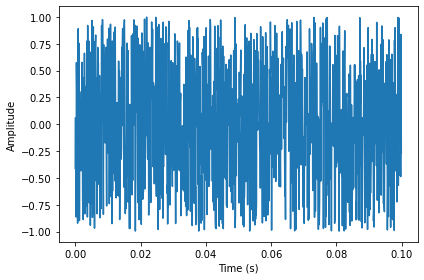

In [5]:
segment = wave.segment(duration=0.1)
segment.plot()
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

And here's the spectrum:

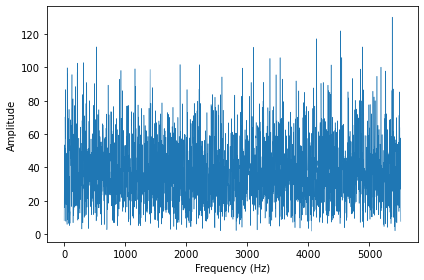

In [6]:
spectrum = wave.make_spectrum()
spectrum.plot(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude')

In the context of noise it is more conventional to look at the spectrum of power, which is the square of amplitude:

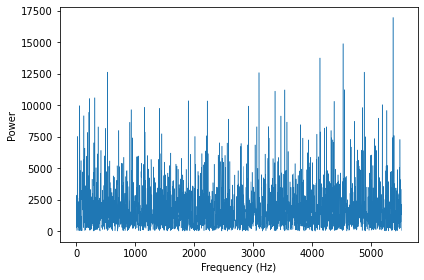

In [7]:
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

UU noise has the same power at all frequencies, on average, which we can confirm by looking at the normalized cumulative sum of power, which I call an integrated spectrum:

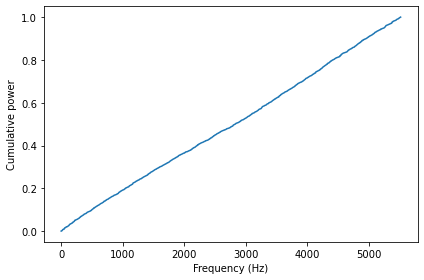

In [8]:
integ = spectrum.make_integrated_spectrum()
integ.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Cumulative power')

A straight line in this figure indicates that UU noise has equal power at all frequencies, on average.  By analogy with light, noise with this property is called "white noise".

### Brownian noise

Brownian noise is generated by adding up a sequence of random steps.

In [9]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

The sound is less bright, or more muffled, than white noise.

Here's what the wave looks like:

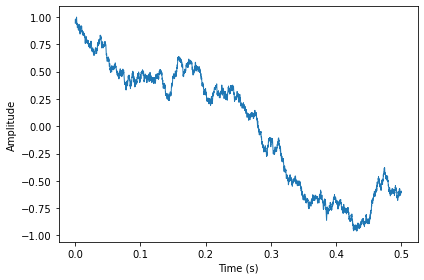

In [10]:
wave.plot(linewidth=1)
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

Here's what the power spectrum looks like on a linear scale.

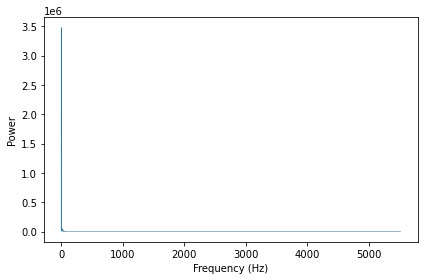

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

So much of the energy is at low frequencies, we can't even see the high frequencies.

We can get a better view by plotting the power spectrum on a log-log scale.

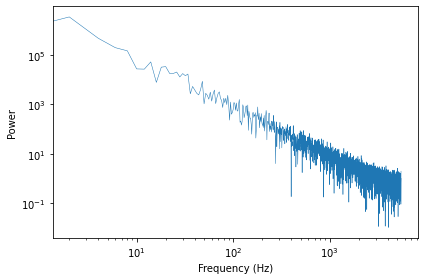

In [12]:
# The f=0 component is very small, so on a log scale
# it's very negative.  If we clobber it before plotting,
# we can see the rest of the spectrum more clearly.
spectrum.hs[0] = 0

spectrum.plot_power(linewidth=0.5)

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Now the relationship between power and frequency is clearer.  The slope of this line is approximately -2, which indicates that $P = K / f^2$, for some constant $K$.

In [13]:
signal =  BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
result = spectrum.estimate_slope()
result.slope

-1.7846032211221763

The estimated slope of the line is closer to -1.8 than -2, for reasons we'll see later.

### Pink noise

Pink noise is characterized by a parameter, $\beta$, usually between 0 and 2.  You can hear the differences below.

With $\beta=0$, we get white noise:

In [14]:
from thinkdsp import PinkNoise

signal = PinkNoise(beta=0)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

With $\beta=1$, pink noise has the relationship $P = K / f$, which is why it is also called $1/f$ noise.

In [15]:
signal = PinkNoise(beta=1)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

With $\beta=2$, we get Brownian (aka red) noise.

In [16]:
signal = PinkNoise(beta=2)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

The following figure shows the power spectrums for white, pink, and red noise on a log-log scale.

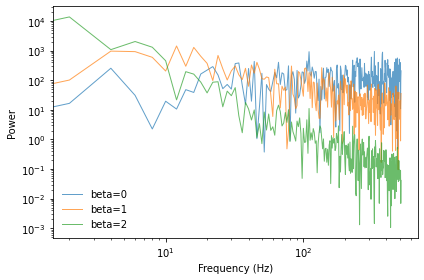

In [17]:
betas = [0, 1, 2]

for beta in betas:
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5, framerate=1024)
    spectrum = wave.make_spectrum()
    spectrum.hs[0] = 0
    label = f'beta={beta}'
    spectrum.plot_power(linewidth=1, alpha=0.7, label=label)
    
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

### Uncorrelated Gaussian noise

An alternative to UU noise is uncorrelated Gaussian (UG noise).

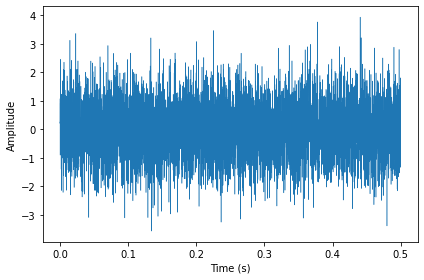

In [18]:
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.plot(linewidth=0.5)
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

The spectrum of UG noise is also UG noise.

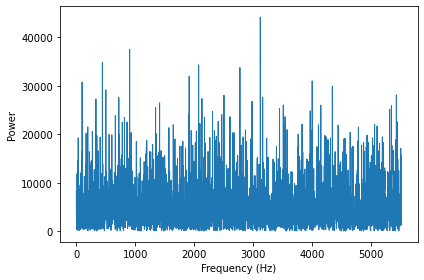

In [19]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=1)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

We can use a normal probability plot to test the distribution of the power spectrum.

In [20]:
def normal_prob_plot(sample, fit_color='0.8', **options):
    """Makes a normal probability plot with a fitted line.

    sample: sequence of numbers
    fit_color: color string for the fitted line
    options: passed along to Plot
    """
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.sort(sample)
    
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color='gray', alpha=0.5, label='model')

    plt.plot(xs, ys, **options)

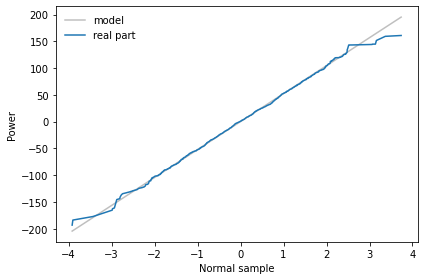

In [21]:
normal_prob_plot(spectrum.real, color='C0', label='real part')
decorate(xlabel='Normal sample',
         ylabel='Power')

A straight line on a normal probability plot indicates that the distribution of the real part of the spectrum is Gaussian.

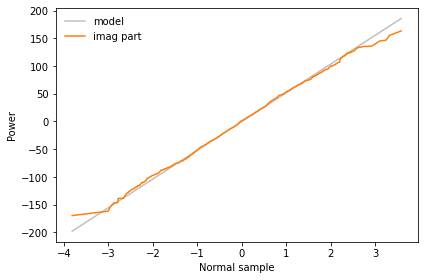

In [22]:
normal_prob_plot(spectrum.imag, color='C1', label='imag part')
decorate(xlabel='Normal sample',
         ylabel='Power')

And so is the imaginary part.

# Exercise 1

Камин

In [23]:
from thinkdsp import read_wave

wave = read_wave('sounds/132534__inchadney__fireplace.wav')
segment = wave.segment(start=0, duration=1.0)
segment.make_audio()

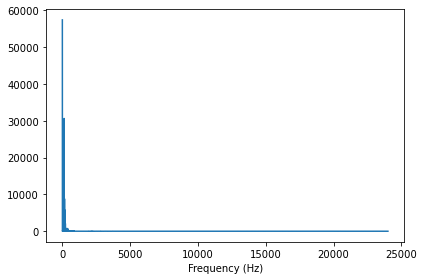

In [24]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)')

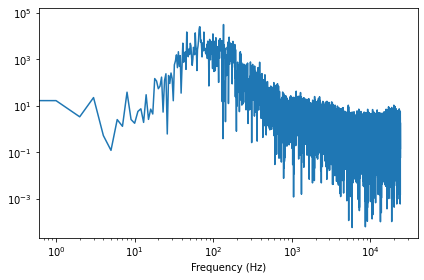

In [25]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

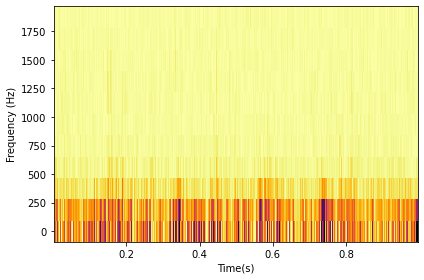

In [26]:
segment.make_spectrogram(256).plot(high=2000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Сверчки

In [27]:
from thinkdsp import read_wave

wave = read_wave('sounds/22604__martypinso__dmp010037-crickets-texas.wav')
segment = wave.segment(start=1.0, duration=1.0)
segment.make_audio()

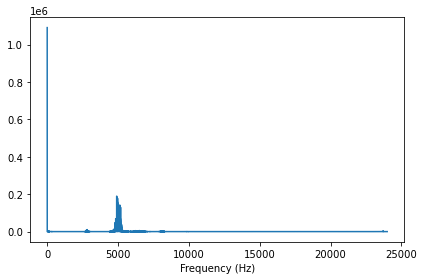

In [28]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)')

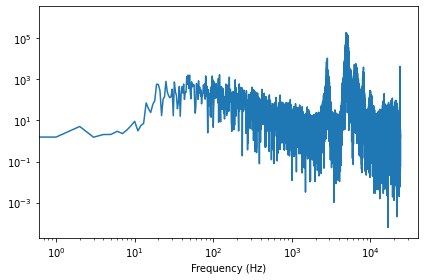

In [29]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

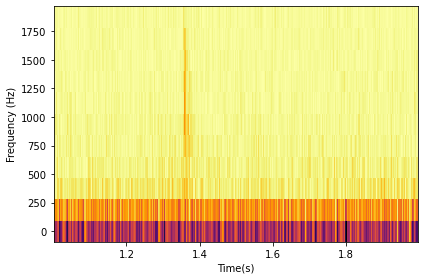

In [30]:
segment.make_spectrogram(256).plot(high=2000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

# Exercise 2

In [31]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    psds = [spectrum.power for spectrum in spectrums]
    
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

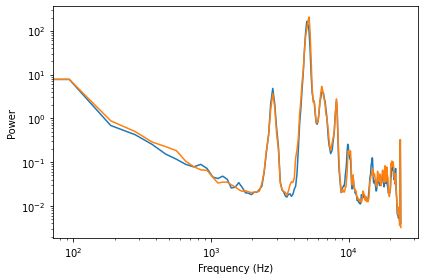

In [32]:
wave = read_wave('sounds/22604__martypinso__dmp010037-crickets-texas.wav')
segment1 = wave.segment(start=1.0, duration=1.0)
segment2 = wave.segment(start=2.5, duration=1.0)

bart1 = bartlett_method(segment1)
bart2 = bartlett_method(segment2)

bart1.plot_power()
bart2.plot_power()

decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

# Exercise 3

In [33]:
import pandas as pd

df = pd.read_csv('files/BTC_USD_2020-04-12_2021-04-11-CoinDesk.csv')
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-04-12,6873.848495,6872.137266,6949.788875,6777.889694
1,BTC,2020-04-13,7043.438864,6873.848555,7201.990355,6797.779063
2,BTC,2020-04-14,6889.863772,7043.438893,7050.771025,6600.771494
3,BTC,2020-04-15,6887.554908,6889.863978,6991.326397,6772.322132
4,BTC,2020-04-16,6718.799950,6887.548898,6942.907080,6701.021116
...,...,...,...,...,...,...
360,BTC,2021-04-07,58040.187602,59133.655740,59484.199475,57421.853085
361,BTC,2021-04-08,56508.942864,58030.621849,58645.772971,55541.906134
362,BTC,2021-04-09,57880.905684,55996.080360,58179.656864,55758.491178
363,BTC,2021-04-10,58171.909019,58094.744128,58880.821608,57717.859778


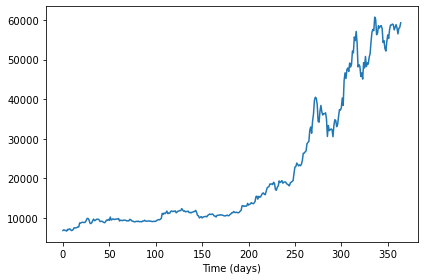

In [34]:
from thinkdsp import Wave
ys = df['Closing Price (USD)']
ts = df.index
wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

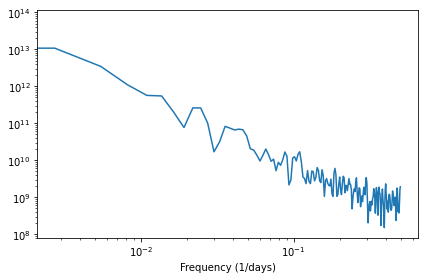

In [35]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)', **loglog)

In [36]:
spectrum.estimate_slope()[0]

-1.781525389594605

# Exercise 4

In [37]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

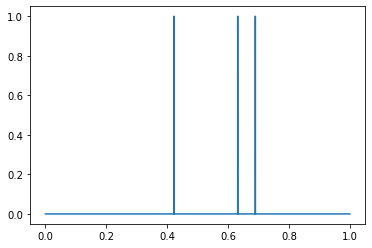

In [38]:
signal1 = UncorrelatedPoissonNoise(amp=0.0005)
wave1 = signal1.make_wave(duration=1, framerate=10000)
wave1.plot()
wave1.make_audio()

In [39]:
expected = 0.0005 * 10000 * 1
actual = sum(wave1.ys)
print(expected, actual)

5.0 3


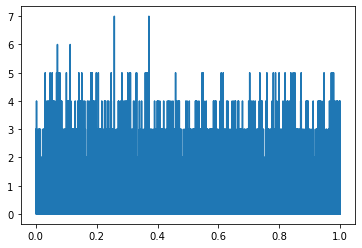

In [40]:
signal2 = UncorrelatedPoissonNoise(amp=1)
wave2 = signal2.make_wave(duration=1, framerate=10000)
wave2.plot()
wave2.make_audio()

In [41]:
expected = 1 * 10000 * 1
actual = sum(wave2.ys)
print(expected, actual)

10000 9984


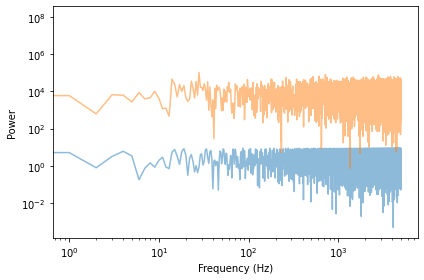

In [42]:
spectrum1 = wave1.make_spectrum()
spectrum2 = wave2.make_spectrum()

spectrum1.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

# Exercise 5

In [46]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    data = pd.DataFrame(array)
    data.fillna(method='ffill', axis=0, inplace=True)
    total = data.sum(axis=1)

    return total.values

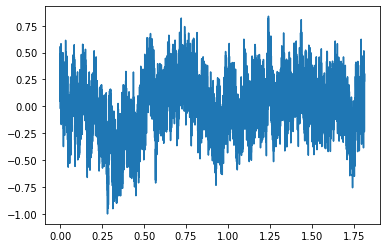

In [64]:
from thinkdsp import Wave
wave = Wave(voss(20000))
wave.unbias()
wave.normalize()
wave.plot()
wave.make_audio()

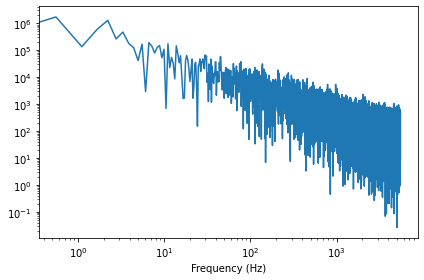

In [53]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', **loglog)

In [54]:
spectrum.estimate_slope().slope

-0.9973556467884676

In [65]:
seg_length = 64 * 2048
wave = Wave(voss(seg_length * 100))
len(wave)

13107200

In [66]:
spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0
len(spectrum)

65537

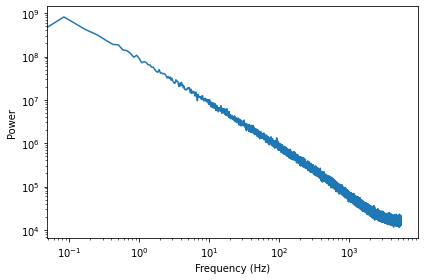

In [69]:
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [68]:
spectrum.estimate_slope().slope

-1.0017426178358126